In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import time

In [5]:
vid_name = "03/0"
rank = 0
video = cv2.VideoCapture(vid_name + ".MOV")
_, frame = video.read()

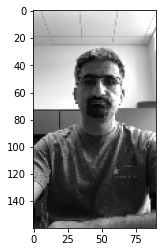

In [7]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
resize_crop = cv2.resize(gray, (90, 160))
plt.imshow(resize_crop, cmap="gray")

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [10]:
resize_crop = resize_crop.flatten()
scaled = scaler.fit_transform(resize_crop.reshape(-1, 1))
scaled = np.append(np.array([rank]), scaled).reshape(1, -1)
scaled

array([[0.        , 0.80876494, 0.812749  , ..., 0.25498008, 0.27091633,
        0.27091633]])

In [4]:
global df
df = pd.DataFrame()

In [5]:
def get_frame(sec):
    video.set(cv2.CAP_PROP_POS_MSEC, sec*1000)
    success, image = video.read()
    return success, image

In [26]:
def get_data(sec):
    global df
    start = time.time()
    success, image  = get_frame(sec)
    if not success:
        return
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (90, 160))
    scaled = scaler.fit_transform(resized).flatten()
    out = np.append(np.array([rank]), scaled).flatten()
    df = df.append(pd.Series(out), ignore_index=True)

In [28]:
for p in ["01", "02", "03", "04", "05", "06"]:
    for r in [0, 5, 10]:
        vid_name = p + "/" + str(r)
        rank = r
        video = cv2.VideoCapture(vid_name + ".MOV")
        success, _ = video.read()
        if not success:
            video = cv2.VideoCapture(vid_name + ".mp4")
        
        start = time.time()
        df = pd.DataFrame()
        for i in range(0, 600, 10):
            elapsed = time.time() - start
            done = (i+1)/600
            estimate = int(elapsed/done - elapsed)
            print(f"Currently at {i//60} minutes and {i%60} seconds -- Estimated {estimate}s left on {vid_name}        ", end="\r")

            get_data(i)

        df.to_csv("data/" + p + "-" + str(r) + ".csv", header=False, index=False)